In [9]:
# !pip install scipy

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
#from utils import discrete_plot
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import datetime as dt
import calendar
from scipy.stats import skew,kurtosis

In [7]:
data = pd.read_csv("/Volumes/GoogleDrive/My Drive/Jobs & Internship/Interview/Stout/casestudy.csv")
data.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [9]:
# Total number of users
print("Total number of customers",data['customer_email'].count(),'\n')
print("Total number of unique customers",data['customer_email'].nunique(),'\n')
print("Total number of repeated customers",(data['customer_email'].count()) - (data['customer_email'].nunique()))

Total number of customers 685927 

Total number of unique customers 604618 

Total number of repeated customers 81309


In [16]:
# Total revenue for current year
total_revenue = data.groupby('year')['net_revenue'].sum()
total_revenue

total_revenue_2017= data.loc[data['year']==2017]['net_revenue'].sum()

print("Total revenue for year 2017 is: ",round(total_revenue_2017,2) )

Total revenue for year 2017 is:  31417495.03


In [14]:
total_revenue_2017= data.loc[data['year']==2017]['net_revenue'].sum()

In [17]:
# 1 - Total Revenue
total_revenue

year
2015    29036749.19
2016    25730943.59
2017    31417495.03
Name: net_revenue, dtype: float64

In [25]:
# 
data.loc[data['year']==2017]['customer_email'].nunique()

249987

In [60]:
# New Customer Revenue
new_cust =len(set(data.loc[data['year']==2017]['customer_email'].tolist())-\
    set(data.loc[data['year']==2016]['customer_email'].tolist())-\
    set(data.loc[data['year']==2015]['customer_email'].tolist()))

In [64]:
lost_cust = len (set(data.loc[data['year']==2016]['customer_email'].tolist())-\
    set(data.loc[data['year']==2015]['customer_email'].tolist()))

In [31]:
New_cust_rev = data.set_index('customer_email').loc[list(set(data.loc[data['year']==2017]['customer_email'].tolist())-\
    set(data.loc[data['year']==2016]['customer_email'].tolist())-\
    set(data.loc[data['year']==2015]['customer_email'].tolist()))].reset_index()['net_revenue'].sum()

In [32]:
print("New Customer Revenue ",round(New_cust_rev,2))

New Customer Revenue  28676607.64


In [33]:
existing_customers_2017 = list(set(data.loc[data['year']==2017]['customer_email']).intersection(set(data.loc[data['year']==2016]['customer_email'])))

In [34]:
len(existing_customers_2017)

20959

In [36]:
# Existing Customer Revuew Current Year 2017-2016
temp1 = data.set_index('customer_email').loc[existing_customers_2017]
temp1.loc[temp1['year']==2017]['net_revenue'].sum()-temp1.loc[temp1['year']==2016]['net_revenue'].sum()

Print ("")

20611.33999999985

In [46]:
# Existing Customer Revuew Previous Year 2016-2015
temp1 = data.set_index('customer_email').loc[existing_customers_2017]
temp2=temp1.loc[temp1['year']==2016]['net_revenue'].sum()-temp1.loc[temp1['year']==2015]['net_revenue'].sum()

print("Existing Customer Review Previous Year 2016-2015:  ", round(temp2,2))

Existing Customer Review Previous Year 2016-2015:   1847786.37


In [52]:
user_2017= data.loc[data['year'] == 2017]
user_2016= data.loc[data['year'] == 2016]
user_2015= data.loc[data['year'] == 2015]

In [58]:
#Total Customers Current Year
print ("# Total Customers Current Year", user_2017.count())

# Total Customers Current Year Unnamed: 0        249987
customer_email    249987
net_revenue       249987
year              249987
dtype: int64


In [59]:
#Total Customers Previous Year
print ("# Total Customers Current Year", user_2016.count())

# Total Customers Current Year Unnamed: 0        204646
customer_email    204646
net_revenue       204646
year              204646
dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Frequency')

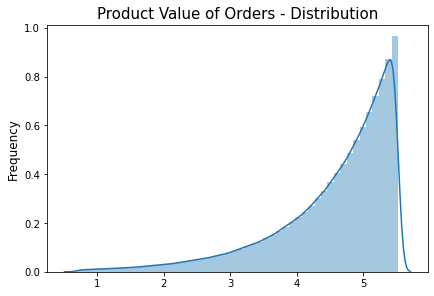

In [62]:
# Lets plot a histogram of the net revenue to understand the skewness
plt.figure(figsize=(15,10))

plt.subplot(221)
g = sns.distplot(np.log(data['net_revenue'] + 1))
g.set_title("Product Value of Orders - Distribution", fontsize=15)
g.set_xlabel("")
g.set_ylabel("Frequency", fontsize=12)

In [61]:
# New Customer
print("Total number of unique customers",data['customer_email'].nunique(),'\n')

Total number of unique customers 604618 



In [67]:
# Lost Customer
print("Total number of lost customers", round(lost_cust))

Total number of lost customers 145062
